# Forecasting a Time Series 


### Data loading & Processing 

In [1]:
%matplotlib inline
import pandas as pd


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)


data = pd.read_csv("sample.csv",index_col=0)
data.head()

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


Right now our index is actually just a list of strings that look like a date, we'll want to adjust these to be timestamps, that way our forecasting analysis will be able to interpret these values:

In [2]:
data.index

Index(['1985-01-01', '1985-02-01', '1985-03-01', '1985-04-01', '1985-05-01',
       '1985-06-01', '1985-07-01', '1985-08-01', '1985-09-01', '1985-10-01',
       ...
       '2017-04-01', '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
       '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01', '2018-01-01'],
      dtype='object', name='DATE', length=397)

In [3]:
data.index = pd.to_datetime(data.index)

In [4]:
data.head()

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [5]:
data.index

DatetimeIndex(['1985-01-01', '1985-02-01', '1985-03-01', '1985-04-01',
               '1985-05-01', '1985-06-01', '1985-07-01', '1985-08-01',
               '1985-09-01', '1985-10-01',
               ...
               '2017-04-01', '2017-05-01', '2017-06-01', '2017-07-01',
               '2017-08-01', '2017-09-01', '2017-10-01', '2017-11-01',
               '2017-12-01', '2018-01-01'],
              dtype='datetime64[ns]', name='DATE', length=397, freq=None)

Let's first make sure that the data doesn't have any missing data points:

In [6]:
data[pd.isnull(data['IPG2211A2N'])]

,IPG2211A2N
DATE,


Let's also rename this column since its hard to remember what "IPG2211A2N" code stands for:

In [37]:
data.columns = ['Value']

In [38]:
data.tail()

,Value
DATE,
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359
2017-12-01,114.7212
2018-01-01,129.4048


### ARIMA Time Series Model Setting 

In [9]:
import itertools

# S_period: periodicity of the time series (4 for quarterly periods, 12 for yearly periods for monthly data, etc.)
S_period = 12

# Define the p, d and q parameters to take any value between 0 and 2
#p = d = q = range(0, 5)

p = range(0, 2)
d = range(0, 2)
q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], S_period) for x in list(itertools.product(p, d, q))]

In [10]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

###  Parameter Selection for the ARIMA Time Series Model

In [11]:
import warnings
import statsmodels.api as sm
import numpy as np
import time


warnings.filterwarnings("ignore") # specify to ignore warning messages


cnt_loop = 0


aic_table = pd.DataFrame(np.zeros((len(pdq), len(seasonal_pdq))), index = pdq, columns = seasonal_pdq)

print("Time mearuse started.")
startTime = time.time()
                         
for param in pdq:
    for param_seasonal in seasonal_pdq:

        mod = sm.tsa.statespace.SARIMAX(data,
                                        order=param,
                                        seasonal_order=param_seasonal,
                                        enforce_stationarity=False,
                                        enforce_invertibility=False)

        results = mod.fit()


        print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))

        aic_table[param, param_seasonal] = results.aic

        if cnt_loop == 0:
            min_aic = results.aic
            min_aic_param = param
            min_aic_param_seasonal = param_seasonal

        if results.aic < min_aic:
            min_aic = results.aic
            min_aic_param = param
            min_aic_param_seasonal = param_seasonal          
        cnt_loop = cnt_loop + 1             

            


endTime = time.time() - startTime
print("Spent time:", endTime) 

print("Minimum AIC value:", min_aic) 

Time mearuse started.
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:4691.4667493072775
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:4080.9476251238857
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2088.268212864109
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2030.2661134098169
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2056.914633885045
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:2019.74403451718
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:2034.8300266663969
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:2031.579187324614
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:4165.484637385999
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:3592.1349009981645
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1951.164484343154
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1878.220723320365
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1941.5274831528436
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2083.829729921317
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1890.6987113535683
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1879.1996983467427
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:2742.1936343251677
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AI

KeyError: '[(0, 0, 0) (0, 0, 1) (0, 1, 0) (0, 1, 1) (1, 0, 0) (1, 0, 1) (1, 1, 0)\n (1, 1, 1)] not in index'

In [13]:
min_combination = {"min_aic":min_aic, "min_aic_param":min_aic_param, "min_aic_param_seasonal":min_aic_param_seasonal}


print(min_combination)


{'min_aic': 1725.091962845605, 'min_aic_param': (1, 1, 1), 'min_aic_param_seasonal': (0, 1, 1, 12)}


### Fitting an ARIMA Time Series Model

In [39]:


mod = sm.tsa.statespace.SARIMAX(data,
                                order=min_aic_param,
                                seasonal_order=min_aic_param_seasonal,
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()


print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5234      0.046     11.473      0.000       0.434       0.613
ma.L1         -0.9540      0.018    -53.369      0.000      -0.989      -0.919
ma.S.L12      -0.7599      0.036    -21.271      0.000      -0.830      -0.690
sigma2         5.9673      0.355     16.824      0.000       5.272       6.662


### Diagnosis of model

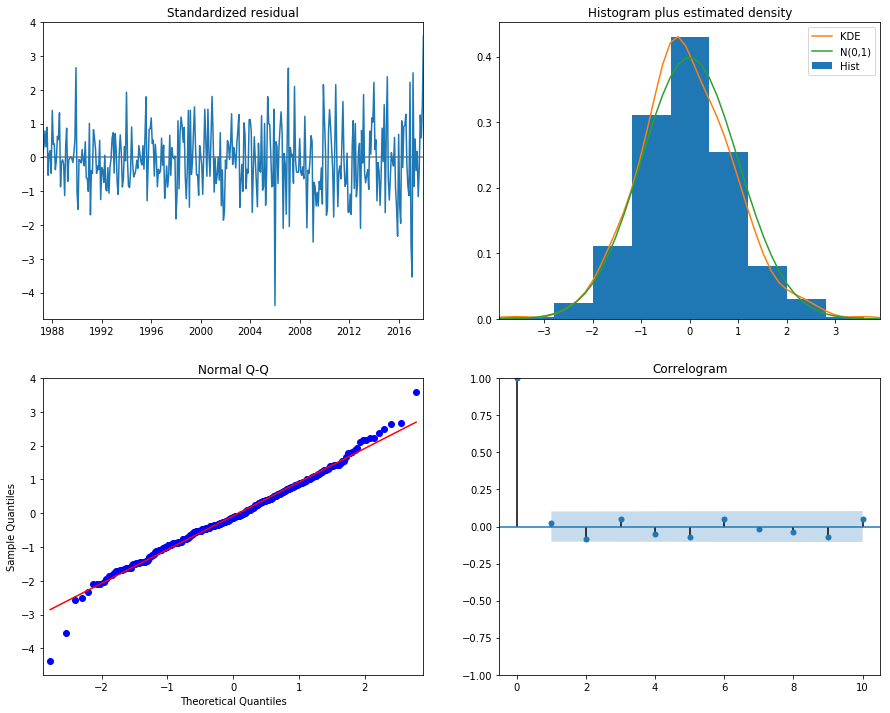

In [40]:
import matplotlib.pyplot as plt

results.plot_diagnostics(figsize=(15, 12))
plt.show()

### Validating Forecasts

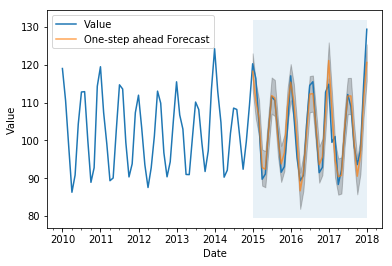

In [89]:


PREDICTION_START_DATETIME = pd.to_datetime('2015-01-01')

pred = results.get_prediction(start=PREDICTION_START_DATETIME, dynamic=False)
"""
The dynamic=False argument ensures that we produce one-step ahead forecasts, meaning that forecasts at each point are generated using the full history up to that point.
"""

# confidence intervals for forcasts of the time series 
pred_ci = pred.conf_int()



# plotting forcast result
ax = data['2010-01-01':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.fill_betweenx(ax.get_ylim(), PREDICTION_START_DATETIME, data.index[-1],
                 alpha=.1, zorder=-1)


ax.set_xlabel('Date')
ax.set_ylabel('Value')
plt.legend()

plt.show()




### Generating table including all information

In [85]:
df_true_value = data.copy()
df_true_value.columns = ['Value']

df_predicted_mean = pd.DataFrame(pred.predicted_mean)
df_predicted_mean.index = pd.to_datetime(df_predicted_mean.index)
df_predicted_mean.index.name = 'DATE'
df_predicted_mean.columns = ['Predicted value']
df_pred_ci = pred_ci.copy()
df_pred_ci.index = pd.to_datetime(df_pred_ci.index)
df_pred_ci.index.name = 'DATE'

#df['Abnomal'] = df[]

#result = left.join(right, how='outer')
df = df_true_value.join(df_predicted_mean, how = 'outer')
df = df.join(df_pred_ci, how = 'outer')

### Calculating MSE, MAPE

In [87]:

y_forecasted = df.loc[PREDICTION_START_DATETIME:, 'Predicted value'].values
y_truth = df.loc[PREDICTION_START_DATETIME:, 'Value'].values

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

# Compute the mean square error

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_truth, y_forecasted)
print('The Mean Absolute Percentage Error of our forecasts is {}'.format(round(mape, 2)))

The Mean Squared Error of our forecasts is 13.05
The Mean Absolute Percentage Error of our forecasts is 2.76


In [88]:
df.ix[PREDICTION_START_DATETIME:, 'Predicted value']

DATE
2015-01-01    118.244375
2015-02-01    110.540847
2015-03-01    106.046752
2015-04-01     92.824619
2015-05-01     92.405206
2015-06-01    102.305772
2015-07-01    111.861506
2015-08-01    111.214587
2015-09-01    100.470914
2015-10-01     93.802448
2015-11-01     96.703098
2015-12-01    108.917110
2016-01-01    115.410121
2016-02-01    110.167646
2016-03-01    100.114284
2016-04-01     86.678683
2016-05-01     91.463143
2016-06-01    101.807558
2016-07-01    112.229750
2016-08-01    112.395395
2016-09-01    103.370974
2016-10-01     93.610830
2016-11-01     95.648183
2016-12-01    107.335516
2017-01-01    121.134887
2017-02-01    108.136909
2017-03-01     94.917382
2017-04-01     90.439797
2017-05-01     90.741988
2017-06-01    103.095155
2017-07-01    111.726040
2017-08-01    111.762759
2017-09-01     99.406697
2017-10-01     90.542287
2017-11-01     95.926971
2017-12-01    110.955916
2018-01-01    120.619730
Name: Predicted value, dtype: float64

In [ ]:
#from pyramid.arima import auto_arima